Information about the images : (60000, 784)
Information about the labels : (60000,)


C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Decision tree with Gini')

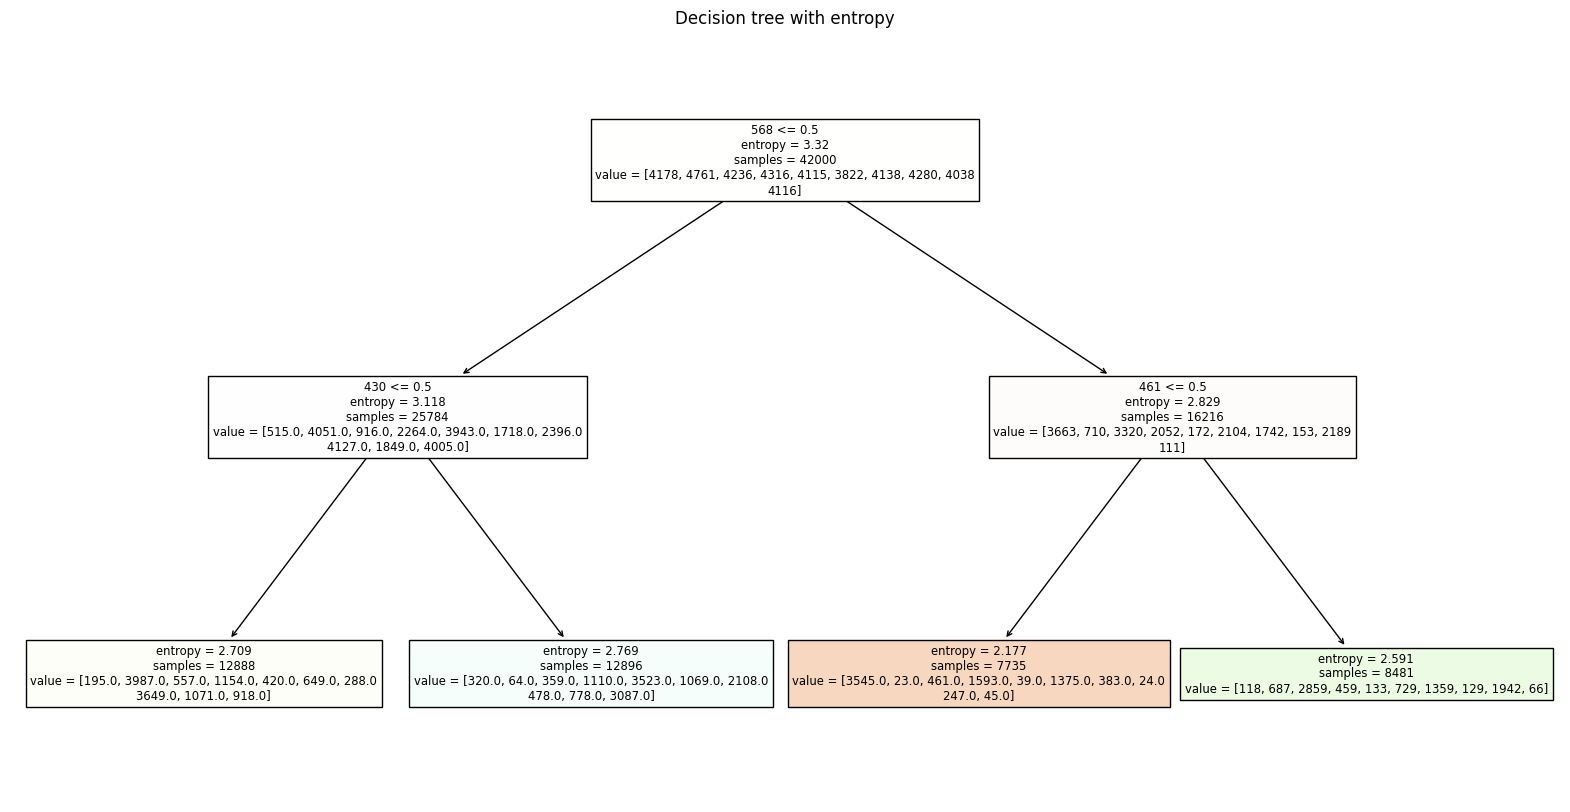

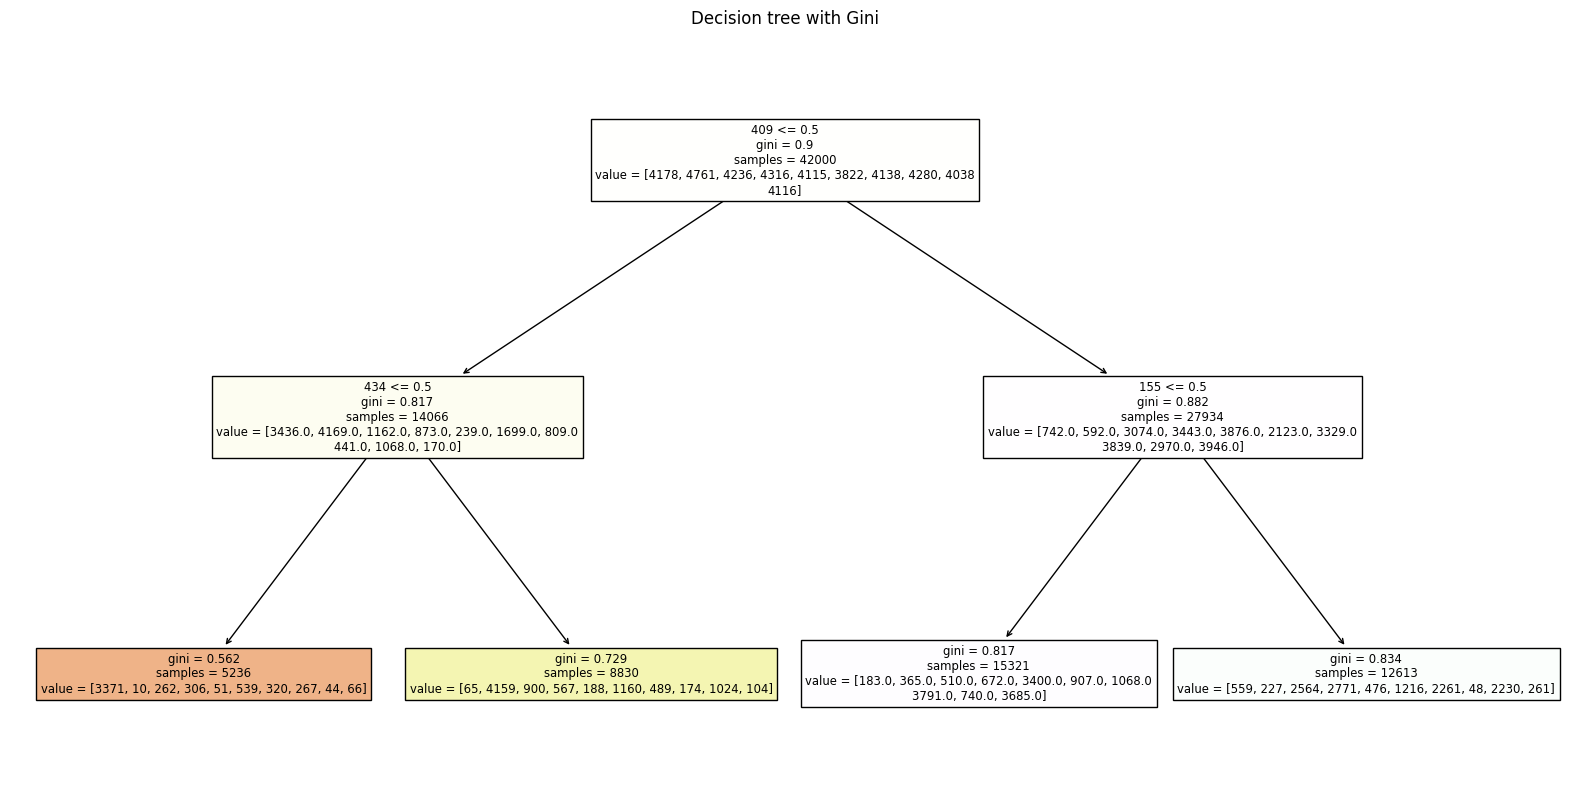

In [25]:
from mnist import MNIST
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mndata = MNIST('.')
images, labels = mndata.load_training()
images = np.array(images)
labels = np.array(labels)

print(f"Information about the images : {images.shape}")
print(f"Information about the labels : {labels.shape}")

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model1.fit(x_train, y_train)

model2 = DecisionTreeClassifier(criterion='gini', max_depth=2)
model2.fit(x_train, y_train)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(model1, max_depth=2, feature_names=range(784), filled=True, ax=ax)
ax.set_title("Decision tree with entropy")

fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(model2, max_depth=2, feature_names=range(784), filled=True, ax=ax)
ax.set_title("Decision tree with Gini")

In [26]:
#================================================ K N N ===============================================
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
import math

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=math.floor(math.sqrt(len(y_test)))-1, p=2, metric='euclidean')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=133)

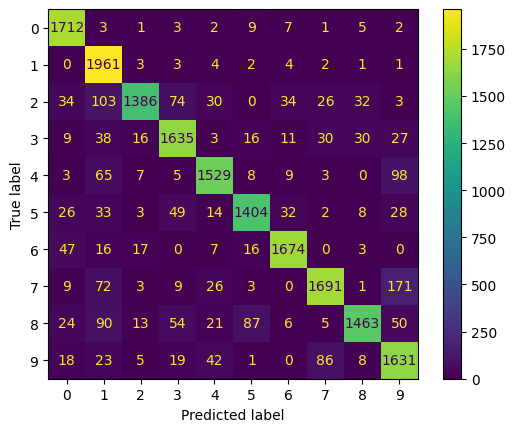

KNN model's score: 0.8945
The logistic model's score: 0.7796428571428572
The entropy model's score: 0.28464285714285714
The gini model's score: 0.29814285714285715


In [27]:
y_pred = knn_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot()
plt.show()

print("KNN model's score:", knn_model.score(x_train, y_train))
print(f"The logistic model's score: {logistic_model.score(x_train, y_train)}")
print(f"The entropy model's score: {model1.score(x_train, y_train)}")
print(f"The gini model's score: {model2.score(x_train, y_train)}")

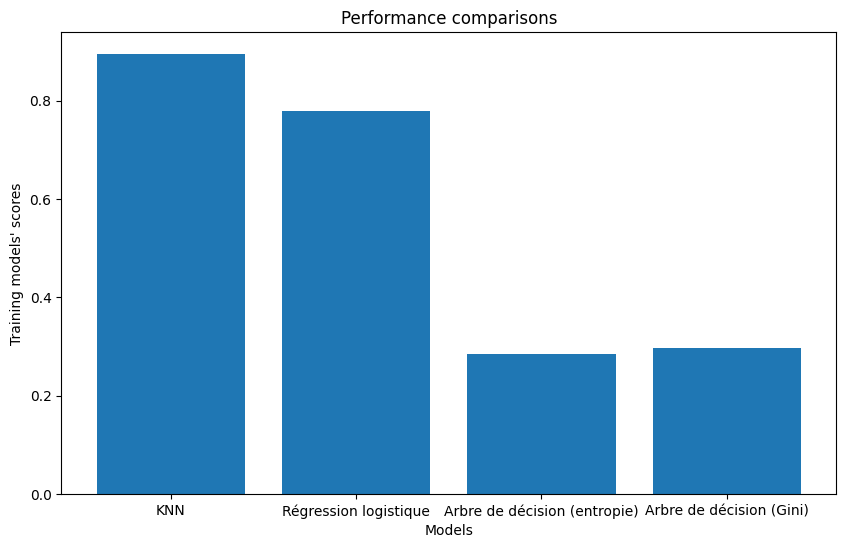

In [28]:
models = ['KNN', 'Régression logistique', 'Arbre de décision (entropie)', 'Arbre de décision (Gini)']
scores = [knn_model.score(x_train, y_train), logistic_model.score(x_train, y_train),
          model1.score(x_train, y_train), model2.score(x_train, y_train)]

plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Training models\' scores')
plt.title('Performance comparisons')
plt.show()

The performance comparison on the MNIST handwritten digit classification task showed that the KNN and logistic regression models significantly outperformed decision tree models on the training data. KNN achieved the highest score of around 0.8945, followed by logistic regression at 0.7796, while decision trees with entropy and Gini criteria performed poorly with scores below 0.30.